In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Setting Plot Style
plt.style.use('ggplot')

In [4]:
# Reading data 
df = pd.read_csv('day.csv')

In [5]:
# Checking head of data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the dimensions of the data
df.shape

(730, 16)

In [7]:
# Checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


# Data Preprocessing for EDA

###### Converting Nominal and Ordinal Variables to Categorical Variable
 - season 
 - mnth
 - weekday
 - weathersit

In [8]:
# Converting season variable
df['season']=df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [9]:
# Converting mnth variable to respective Month names
df['mnth']=pd.to_datetime(df['mnth'],format='%m').dt.month_name()

In [10]:
# Converting weekday column to respective days of the week
week_day={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
df['weekday']=df['weekday'].map(week_day)

In [11]:
# Converting weathersit to the respective weather conditions
df['weathersit']=df['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'})

In [12]:
# Checking the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Importing combinations 
from itertools import combinations 

In [14]:
# Function that returns top Correlations given a Dataframe(df) and the requires number of top correlations(num)
# num = 10 would return the top 10 correlations in the data
def top_corr(df,num):
    req_col=df._get_numeric_data().columns.tolist()
    if 'const' in req_col:
        req_col.remove('const')
    # Making a copy of the dataframe as we do not want to make changes to our original data.    
    data=df[req_col].copy(deep=True)
    var_list=[]
    for i in combinations(data.columns,2):
        i=list(i)
        var_list.append(i)

    corr_df=pd.DataFrame(var_list,columns=['Var1','Var2'])
    corr_df['Correlations']=corr_df[['Var1','Var2']].apply(lambda x: data[list(x)].corr().iloc[1,0],axis=1)
    corr_df['Corr_abs']=corr_df['Correlations'].abs()
    
    # Returning a Dataframe whose values are sorted according to the absolute correlation values
    return corr_df.sort_values(by='Corr_abs',ascending=False).head(num)


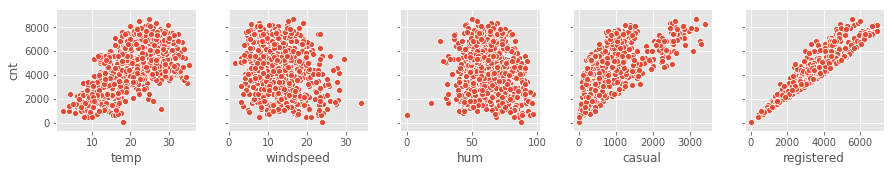

In [15]:
# Checking correlations of temp, windspeed, casual and registered with target variable 'cnt'
sns.pairplot(data=df,y_vars='cnt',x_vars=['temp','windspeed','hum','casual','registered'])

# Show plot
plt.show()

In [16]:
# Getting the top 3 Correlations
top_corr(df[['temp','windspeed','hum','casual','registered','cnt']],3)

,Var1,Var2,Correlations,Corr_abs
14,registered,cnt,0.945411,0.945411
13,casual,cnt,0.672123,0.672123
4,temp,cnt,0.627044,0.627044


###### Dropping dependent columns
- casual
- registered

1. One of the assumptions of Linear Regression model is that all the variables are independent.
+ Here the target variable `'cnt'` is dependent on `casual` and `registered`. 


In [17]:
# Droping casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)

###### Dropping unwanted columns
- instant
- dteday

In [18]:
# Dropping Columns that are not required
df.drop(['instant','dteday'],axis=1,inplace=True)

In [19]:
# Checking the data
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.5+ KB


# Exploratory Data Analysis

###### weathersit : 
 - **`Clear` :** Clear, Few clouds, Partly cloudy, Partly cloudy
 - **`Cloudy` :** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - **`Light Rain` :** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - **`Heavy Rain` :** Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

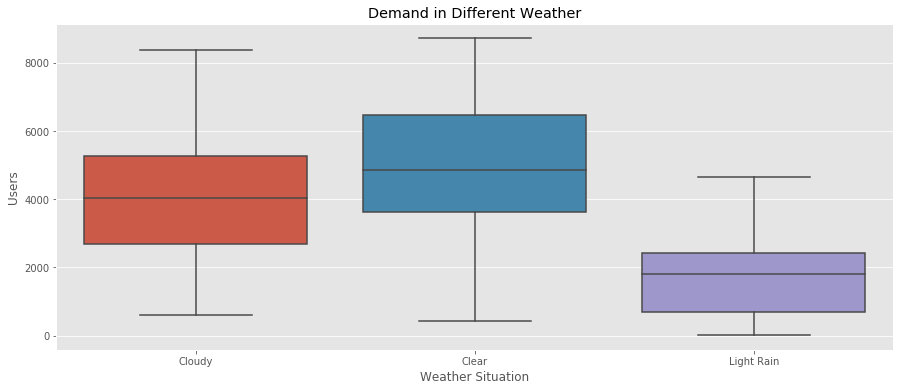

In [21]:
# Plotting Demand of shared bikes in different weather conditions

# Seting the figure size
plt.figure(figsize=(15,6))

# Plotting using seaborn
sns.boxplot(data=df,x='weathersit',y='cnt')

# Seting the title of the plot
plt.title('Demand in Different Weather')

# Seting the x label
plt.xlabel('Weather Situation',fontdict={'size': 12})

# Seting the y label
plt.ylabel('Users',fontdict={'size': 12})

# Displaying the plot
plt.show()

**Observations** : 
   1. We can clearly see that we have no users when there is Heavy Rain(with Ice Pallets, Thunderstorm and Mist) or Snow (with Fogs). 
   2. On an average we can observe that we have the highest number of users when there is a Clear sky, Few clouds, Partly cloudy or Partly cloudy.
   3. We can also see that even when there is light rain there is a significant drop in the demand for shared bikes.

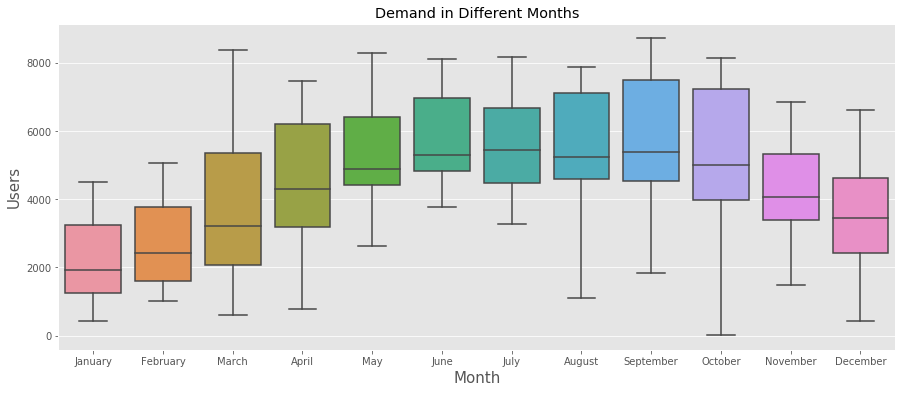

In [22]:
# Plotting Demand of shared bikes in different Months

# Seting the figure size
plt.figure(figsize=(15,6))

# Creaing the plot using seaborn
sns.boxplot(data=df,x='mnth',y='cnt')

# Seting the x label
plt.xlabel('Month',fontdict={'size': 15})

# Seting the y label
plt.ylabel('Users',fontdict={'size': 15})

# Seting the title of the plot
plt.title('Demand in Different Months')

# Displaying the plot
plt.show()

**Observations** : 
   1. We can clearly see that on an average the demand for shared bikes is the lowest in the month of January
   2. We can also observe that we have the highest number of users in the monthe of September 
   3. We can see that the month of October has the highest variation (Different between the upper and the lower bound) in terms of demand for shared bikes.

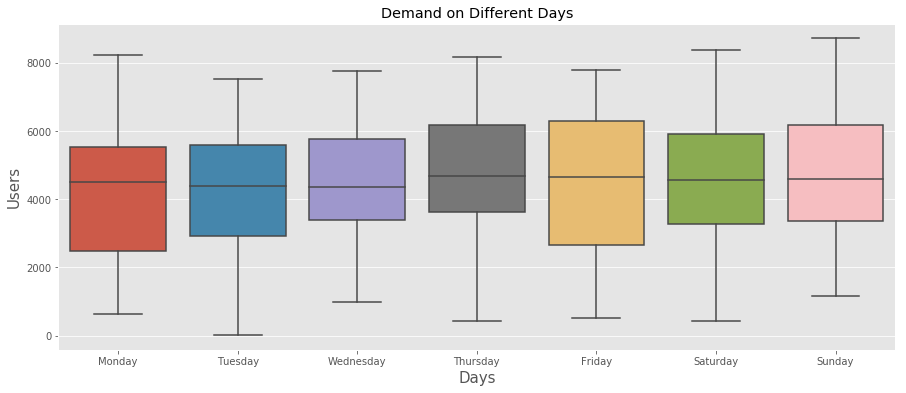

In [23]:
# Plotting Demand of shared bikes on different Days of the week

# Seting the size of the plot
plt.figure(figsize=(15,6))

# Ploting using seaborn
sns.boxplot(data=df,x='weekday',y='cnt')

# Seting the x label
plt.xlabel('Days',fontdict={'size': 15})

# Seting the y label
plt.ylabel('Users',fontdict={'size': 15})

# Seting the title of the plot
plt.title('Demand on Different Days')

# Displaying the plot
plt.show()

**Observations** : 
   1. We can clearly see that on an average the demand for shared bikes on different days of te week are similar.

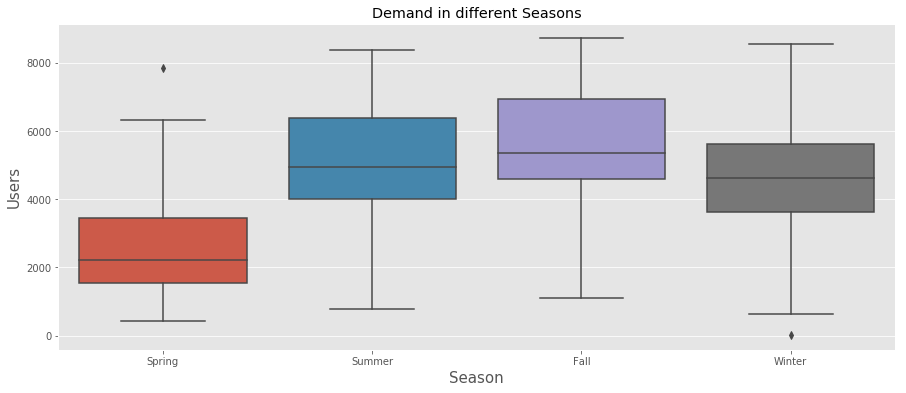

In [24]:
# Plotting Demand of shared bikes in different Seasons

# Seting the figure size
plt.figure(figsize=(15,6))

# Ploting using seaborn
sns.boxplot(data=df,x='season',y='cnt')

# Seting the x label
plt.xlabel('Season',fontdict={'size': 15})

# Seting the y label
plt.ylabel('Users',fontdict={'size': 15})

# Seting the title of the plot
plt.title('Demand in different Seasons')

# Displaying the plot
plt.show()

**Observations** : 
   1. We can clearly see that on an average the demand for shared bikes is lesser in `Spring`.
   2. We can also see that there are outliers in the `Spring` and `Winter` seasons.
   3. We have the highest number of users in `Fall` 

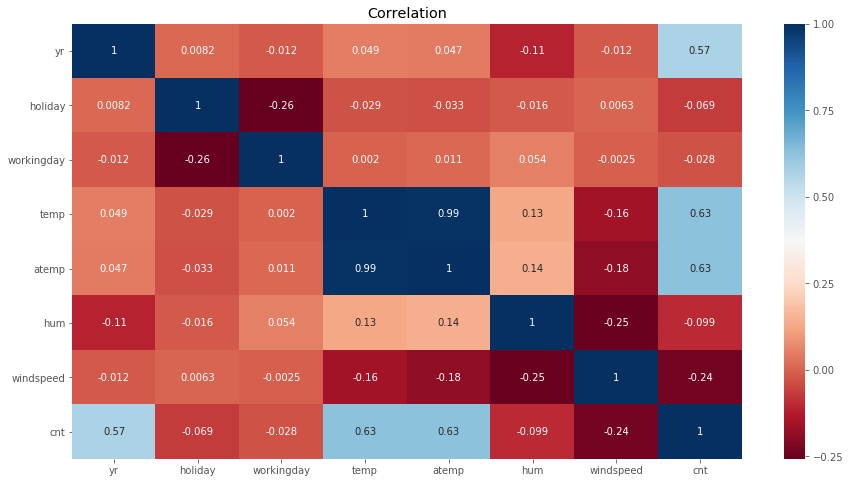

In [25]:
# Seting the figure size
plt.figure(figsize=(15,8))

# Ploting 
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

# Seting the title 
plt.title('Correlation')

# Displaying the plot
plt.show()

In [26]:
# Getting the top 5 Correlations
top_corr(df,5)

,Var1,Var2,Correlations,Corr_abs
18,temp,atemp,0.991696,0.991696
24,atemp,cnt,0.630685,0.630685
21,temp,cnt,0.627044,0.627044
6,yr,cnt,0.569728,0.569728
7,holiday,workingday,-0.257009,0.257009


# Data Preprocessing for Model Building

######  Dummy Variables
 - Get Dummy variables for the following variables:
     1. season - 4 Levels 
     2. mnth - 12 Levels
     3. weekday - 7 Levels
     4. weathersit - 3 Levels

In [27]:
# Function that creates Dummy Variables and returns the updated Dataframe
def dum(df,column):
    if column == 'weathersit':
        dummy_df=pd.get_dummies(df[column])
    else :
        dummy_df=pd.get_dummies(df[column],drop_first=True)
    df=pd.concat([df,dummy_df],axis=1)
    df.drop(i,inplace=True,axis=1)
    return df

Here we are not using the `drop_first=True` for the column `weathersit`, it has 4 levels but since we dont have data for the 4 level we can asume that we have droped the level.

In [28]:
# Loop to call the dum funcion 
for i in ['season','mnth','weekday','weathersit']:
    df=dum(df,i)

In [29]:
# Checking the dimendions of the dataframe
df.shape

(730, 31)

In [30]:
# Checking the head of the dataframe
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Cloudy,Light Rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# Checking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
Spring        730 non-null uint8
Summer        730 non-null uint8
Winter        730 non-null uint8
August        730 non-null uint8
December      730 non-null uint8
February      730 non-null uint8
January       730 non-null uint8
July          730 non-null uint8
June          730 non-null uint8
March         730 non-null uint8
May           730 non-null uint8
November      730 non-null uint8
October       730 non-null uint8
September     730 non-null uint8
Monday        730 non-null uint8
Saturday      730 non-null uint8
Sunday        730 non-null uint8
Thursday      730 non-null uint8
Tuesday       730 non-null ui

In [32]:
# Getting the top 10 Correlations
top_corr(df,10)

,Var1,Var2,Correlations,Corr_abs
87,temp,atemp,0.991696,0.991696
462,Clear,Cloudy,-0.938814,0.938814
116,atemp,cnt,0.630685,0.630685
90,temp,cnt,0.627044,0.627044
117,atemp,Spring,-0.624772,0.624772
91,temp,Spring,-0.619408,0.619408
79,workingday,Saturday,-0.608682,0.608682
80,workingday,Sunday,-0.608682,0.608682
162,hum,Clear,-0.574367,0.574367
6,yr,cnt,0.569728,0.569728


###### Dividing data into train and test data

In [33]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Spliting the daa in to tran and test data
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the Features 
 We will use MinMax scaling.

In [34]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Columns that are to be scaled
var=['temp','atemp','hum','windspeed','cnt']

# Seting the scaler  
scaler= MinMaxScaler()

# Scaling the variables
df_train[var] = scaler.fit_transform(df_train[var])

C:\Users\Thilokesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [35]:
# Checking the data after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Cloudy,Light Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


In [36]:
# Checking the describtion
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Cloudy,Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Dividing training data in to x and y 

In [37]:
# Spliting the train data in to x_train and y_train 
y_train=df_train.pop('cnt')
x_train=df_train

In [38]:
# Checking y_train shape
y_train.shape

(510,)

In [39]:
# Checking x_train shape
x_train.shape

(510, 30)

# Building our model


###### 1. RFE
Recursive Feature Elimination

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [41]:
# Running RFE with the output number of the variable equal to 15

Linear_model = LinearRegression()
Linear_model.fit(x_train,y_train)

# running RFE
rfe = RFE(Linear_model,15)
rfe = rfe.fit(x_train,y_train)

In [42]:
# Checking the result after runing RFE
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 11),
 ('December', False, 2),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 15),
 ('March', False, 16),
 ('May', False, 8),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Clear', True, 1),
 ('Cloudy', True, 1),
 ('Light Rain', True, 1)]

In [43]:
# Geting required collumns 
req_coll = x_train.columns[rfe.support_].to_list()
req_coll

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'Spring',
 'Summer',
 'Winter',
 'January',
 'July',
 'November',
 'September',
 'Clear',
 'Cloudy',
 'Light Rain']

###### 2. Using statsmodels.api

In [44]:
# Importing statsmodels.api
import statsmodels.api as sm

In [45]:
# Taking the results given by RFE
x_train = x_train[req_coll]

In [46]:
# Adding a constant variable to the x_train dataframe
x_train = sm.add_constant(x_train)

In [47]:
# Function that fits the model
def fit_model(y,x):
    return sm.OLS(y,x).fit()

# Storing the model
Linear_model = fit_model(y_train,x_train)

In [48]:
# Looking at the model Summary
Linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.25e-189
Time:                        19:03:29   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1533      0.029      5.273      0.000       0.096       0.210
yr             0.2301      0.008     28.386      0.000       0.214       0.246
holiday       -0.0922      0.026     -3.592      0.000      -0.143      -0.042
temp           0.5052      0.035     14.369      0.000       0.436       0.574
hum           -0.1682      0.038     -4.457      0.000      -0.242      -0.094
windspeed     -0.1854      0.026     -7.179      0.000      -0.236      -0.135
Spring        -0.0564      0.021     -2.664      0.008      -0.098      -0.015
Summer         0.0466      0.015      3.080      0.002       0.017       0.076
Winter         0.0986      0.018      5.519      0.000       0.064       0.134
January       -0.0339      0.018     -1.929      0.054      -0.068       0.001
July          -0.0562      0.018     -3.076      0.002      -0.092      -0.020
November      -0.0253      0.017     -1.463      0.144      -0.059       0.009
September      0.0798      0.017      4.755      0.000       0.047       0.113
Clear          0.1498      0.011     14.230      0.000       0.129       0.170
Cloudy         0.0955      0.013      7.636      0.000       0.071       0.120
Light Rain    -0.0920      0.022     -4.157      0.000      -0.135      -0.049
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                     1.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Function that chaeck the VIF for the given dataframe
def check_vif(x_train):
    vif = pd.DataFrame()
    X_train_new = x_train.drop(['const'], axis=1).copy(deep=True)
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [51]:
# Checking the VIF
check_vif(x_train)

,Features,VIF
12,Clear,49.16
13,Cloudy,32.33
5,Spring,5.20
14,Light Rain,4.16
2,temp,3.97
7,Winter,3.77
6,Summer,2.67
3,hum,1.91
8,January,1.57
9,July,1.49


Here we can clearly see that variable `Clear` has a VIF of 49.16 which is not ideal as it is introducing multicollinearity in the model.

###### Dropping the variable and updating the model

In [52]:
# Droping Clear
x_train.drop('Clear',axis=1,inplace=True)

In [53]:
# Fiting the model and checking the summary
Linear_model = fit_model(y_train,x_train)
Linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.25e-189
Time:                        19:03:29   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.000       0.234       0.372
yr             0.2301      0.008     28.386      0.000       0.214       0.246
holiday       -0.0922      0.026     -3.592      0.000      -0.143      -0.042
temp           0.5052      0.035     14.369      0.000       0.436       0.574
hum           -0.1682      0.038     -4.457      0.000      -0.242      -0.094
windspeed     -0.1854      0.026     -7.179      0.000      -0.236      -0.135
Spring        -0.0564      0.021     -2.664      0.008      -0.098      -0.015
Summer         0.0466      0.015      3.080      0.002       0.017       0.076
Winter         0.0986      0.018      5.519      0.000       0.064       0.134
January       -0.0339      0.018     -1.929      0.054      -0.068       0.001
July          -0.0562      0.018     -3.076      0.002      -0.092      -0.020
November      -0.0253      0.017     -1.463      0.144      -0.059       0.009
September      0.0798      0.017      4.755      0.000       0.047       0.113
Cloudy        -0.0543      0.010     -5.182      0.000      -0.075      -0.034
Light Rain    -0.2418      0.026     -9.187      0.000      -0.293      -0.190
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Checking the VIF
check_vif(x_train)

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,Spring,4.37
7,Winter,3.78
6,Summer,2.79
12,Cloudy,2.29
0,yr,2.09
8,January,1.67
9,July,1.59


Here we can clearly see that variable `hum` has a VIF of 29.80 which is not ideal as it is introducing multicollinearity in the model.

###### Dropping the variable and updating the model

In [55]:
# Droping hum
x_train.drop('hum',axis=1,inplace=True)

In [56]:
# Fiting the model and checking the summary
Linear_model = fit_model(y_train,x_train)
Linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.54e-186
Time:                        19:03:30   Log-Likelihood:                 502.35
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     496   BIC:                            -917.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2214      0.031      7.216      0.000       0.161       0.282
yr             0.2343      0.008     28.553      0.000       0.218       0.250
holiday       -0.0931      0.026     -3.561      0.000      -0.145      -0.042
temp           0.4656      0.035     13.434      0.000       0.398       0.534
windspeed     -0.1531      0.025     -6.062      0.000      -0.203      -0.103
Spring        -0.0658      0.021     -3.065      0.002      -0.108      -0.024
Summer         0.0399      0.015      2.601      0.010       0.010       0.070
Winter         0.0819      0.018      4.602      0.000       0.047       0.117
January       -0.0388      0.018     -2.169      0.031      -0.074      -0.004
July          -0.0509      0.019     -2.741      0.006      -0.087      -0.014
November      -0.0230      0.018     -1.305      0.192      -0.058       0.012
September      0.0737      0.017      4.328      0.000       0.040       0.107
Cloudy        -0.0811      0.009     -9.269      0.000      -0.098      -0.064
Light Rain    -0.2879      0.025    -11.680      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       62.464   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.173
Skew:                          -0.653   Prob(JB):                     2.99e-32
Kurtosis:                       5.264   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Checking the VIF
check_vif(x_train)

,Features,VIF
2,temp,5.15
3,windspeed,4.67
4,Spring,2.76
6,Winter,2.29
5,Summer,2.23
0,yr,2.07
7,January,1.61
8,July,1.59
9,November,1.59
11,Cloudy,1.56


Here even though the variable `November` has a ideal VIF value the P-Value of the same is very high which indicates that the model is not very confident about the variable.

###### Dropping the variable and updating the model

In [58]:
# Droping November
x_train.drop('November',axis=1,inplace=True)

In [59]:
# Fiting the model and checking the summary
Linear_model = fit_model(y_train,x_train)
Linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.97e-187
Time:                        19:03:30   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.000       0.156       0.275
yr             0.2342      0.008     28.524      0.000       0.218       0.250
holiday       -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp           0.4728      0.034     13.803      0.000       0.405       0.540
windspeed     -0.1549      0.025     -6.140      0.000      -0.205      -0.105
Spring        -0.0615      0.021     -2.898      0.004      -0.103      -0.020
Summer         0.0422      0.015      2.766      0.006       0.012       0.072
Winter         0.0771      0.017      4.424      0.000       0.043       0.111
January       -0.0380      0.018     -2.125      0.034      -0.073      -0.003
July          -0.0507      0.019     -2.728      0.007      -0.087      -0.014
September      0.0762      0.017      4.500      0.000       0.043       0.110
Cloudy        -0.0807      0.009     -9.222      0.000      -0.098      -0.063
Light Rain    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Checking the VIF
check_vif(x_train)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,Spring,2.75
5,Summer,2.22
0,yr,2.07
6,Winter,1.79
7,January,1.61
8,July,1.59
10,Cloudy,1.56
9,September,1.34


Here even though the variable `January` has a ideal VIF value the P-Value of the same is very high which indicates that the model is not very confident about the variable.

###### Dropping the variable and updating the model

In [61]:
# Droping January
x_train.drop('January',axis=1,inplace=True)

In [62]:
# Fiting the model and checking the summary
Linear_model = fit_model(y_train,x_train)
Linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.40e-187
Time:                        19:03:30   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.000       0.142       0.258
yr             0.2335      0.008     28.361      0.000       0.217       0.250
holiday       -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp           0.4915      0.033     14.798      0.000       0.426       0.557
windspeed     -0.1480      0.025     -5.893      0.000      -0.197      -0.099
Spring        -0.0669      0.021     -3.167      0.002      -0.108      -0.025
Summer         0.0453      0.015      2.971      0.003       0.015       0.075
Winter         0.0831      0.017      4.818      0.000       0.049       0.117
July          -0.0524      0.019     -2.811      0.005      -0.089      -0.016
September      0.0767      0.017      4.511      0.000       0.043       0.110
Cloudy        -0.0816      0.009     -9.301      0.000      -0.099      -0.064
Light Rain    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Checking the VIF
check_vif(x_train)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.21
4,Spring,2.08
0,yr,2.07
6,Winter,1.79
7,July,1.58
9,Cloudy,1.55
8,September,1.34
10,Light Rain,1.08


Here even though the variable `July` has a ideal VIF value the P-Value of the same is not zero which indicates that the model is not confident about the variable.

###### Dropping the variable and updating the model

In [64]:
# Droping July
x_train.drop('July',axis=1,inplace=True)

In [65]:
# Fiting the model and checking the summary
Linear_model = fit_model(y_train,x_train)
Linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.36e-187
Time:                        19:03:31   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.000       0.133       0.249
yr             0.2341      0.008     28.246      0.000       0.218       0.250
holiday       -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp           0.4782      0.033     14.446      0.000       0.413       0.543
windspeed     -0.1482      0.025     -5.860      0.000      -0.198      -0.098
Spring        -0.0551      0.021     -2.641      0.009      -0.096      -0.014
Summer         0.0610      0.014      4.271      0.000       0.033       0.089
Winter         0.0959      0.017      5.730      0.000       0.063       0.129
September      0.0909      0.016      5.565      0.000       0.059       0.123
Cloudy        -0.0801      0.009     -9.090      0.000      -0.097      -0.063
Light Rain    -0.2860      0.025    -11.492      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Checking the VIF
check_vif(x_train)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,Spring,1.99
5,Summer,1.89
6,Winter,1.63
8,Cloudy,1.54
7,September,1.23
9,Light Rain,1.08
1,holiday,1.04


This is our final model, the VIF are all less than 5 and all the p-values are also less than 0.05.

# Residual Analysis of the train data

Now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [67]:
# Predicting 
y_train_pred=Linear_model.predict(x_train)

In [68]:
#round((y_train-y_train_pred).mean(),10)
(y_train-y_train_pred).mean()

-5.347030008304982e-16

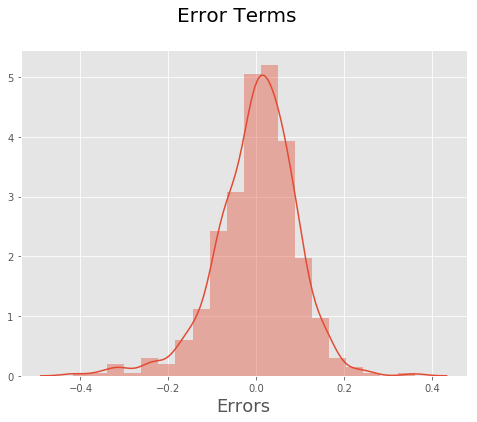

In [69]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,6))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Here we can clearly observe that all the error terms are normaly distributed and the mean of the error terms is closer to zero 

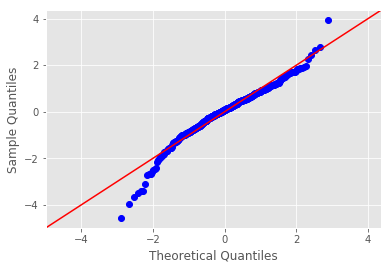

In [70]:
# Ploting Q-Q plot to see if the the residuals are normally distributed
sm.qqplot(Linear_model.resid,fit=True,line='45')
plt.show()

From the observe that the resudiles are normaly distributed but there also seem to be some outliers.  

## Making Predictions

#### Applying the scaling on the test sets

In [71]:
# Scaling test data
df_test[var] = scaler.transform(df_test[var])

In [72]:
# Checking train data
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Cloudy,Light Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [73]:
y_test = df_test.pop('cnt')
x_test = df_test

In [74]:
# Now let's use our model to make predictions.

# Adding a constant variable 
x_test = sm.add_constant(x_test)

# Creating X_test_new dataframe by dropping variables from X_test
x_test = x_test[x_train.columns]


In [75]:
# Making predictions
y_pred = Linear_model.predict(x_test)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

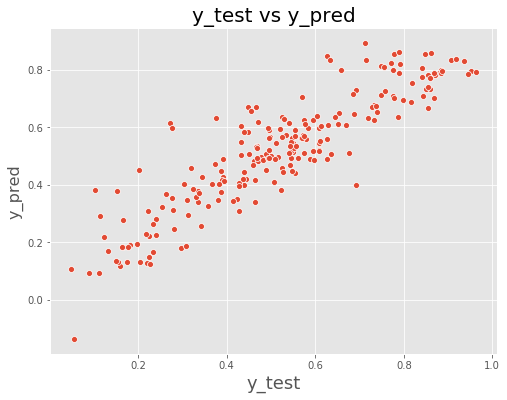

In [76]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(8,6))
sns.scatterplot(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [77]:
# Importing r2_score
from sklearn.metrics import r2_score

# R-squared for the test data 
r2_score(y_test,y_pred)

0.8035441330582013

In [78]:
# Adj. R-squared for the test data 
adj_r2 = (1-(1-r2_score(y_test, y_pred))*((len(x_test)-1)/(len(x_test)-len(x_test.columns)-1)))
adj_r2

0.7931044493076709

In [79]:
#  Final List of variables and their respective coeficient values
final_var = Linear_model.params.to_frame('Coef')
final_var['abs_coef'] = abs(final_var['Coef'])
final_var = final_var.sort_values(by='abs_coef',ascending=False)
final_var.round(3)

,Coef,abs_coef
temp,0.478,0.478
Light Rain,-0.286,0.286
yr,0.234,0.234
const,0.191,0.191
windspeed,-0.148,0.148
holiday,-0.097,0.097
Winter,0.096,0.096
September,0.091,0.091
Cloudy,-0.080,0.080
Summer,0.061,0.061


We can see that the equation of our best fitted line is **:**


$ cnt = 0.478  \times  temp - 0.286  \times  Light Rain + 0.234 \times yr + 0.191 \times const - 0.148 \times windspeed - 0.097 \times holiday + 0.096 \times Winter + 0.091 \times September - 0.080 \times Cloudy + 0.061 \times Summer - 0.055 \times Spring $



We can observe that the following are the Top 3 features contributing significantly towards explaining the demand of the shared bikes :
   1. Temperature
   + Light Rain
   + Year

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Binning continuous variables (windspeed,hum,etc.), to handel outliers in the data. 
2. Add new features (bathrooms/bedrooms, area/stories, etc.).
3. Build a non-linear model.